In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end, end2end_crps

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('mpg')

In [3]:
end2end_model = end2end_crps.train_model(x_train, y_train, calibration_threshold = .03)

initial loss:  795.8045043945312
501 0.050377777777777744 tensor(2.8901, grad_fn=<MeanBackward0>) tensor(1.4407, grad_fn=<MeanBackward0>)
502 0.06810000000000004 tensor(2.9723, grad_fn=<MeanBackward0>) tensor(1.5096, grad_fn=<MeanBackward0>)
503 0.10051111111111109 tensor(3.0397, grad_fn=<MeanBackward0>) tensor(1.5563, grad_fn=<MeanBackward0>)
504 0.08058888888888892 tensor(2.9692, grad_fn=<MeanBackward0>) tensor(1.5060, grad_fn=<MeanBackward0>)
505 0.0692333333333333 tensor(2.9159, grad_fn=<MeanBackward0>) tensor(1.4601, grad_fn=<MeanBackward0>)
506 0.0538777777777778 tensor(2.8797, grad_fn=<MeanBackward0>) tensor(1.4378, grad_fn=<MeanBackward0>)
507 0.04803333333333334 tensor(2.8652, grad_fn=<MeanBackward0>) tensor(1.4222, grad_fn=<MeanBackward0>)
508 0.04605555555555555 tensor(2.8533, grad_fn=<MeanBackward0>) tensor(1.4170, grad_fn=<MeanBackward0>)
509 0.04817777777777778 tensor(2.8484, grad_fn=<MeanBackward0>) tensor(1.4112, grad_fn=<MeanBackward0>)
510 0.04123333333333333 tensor(2

684 0.06275555555555555 tensor(2.6644, grad_fn=<MeanBackward0>) tensor(1.3215, grad_fn=<MeanBackward0>)
685 0.1649444444444445 tensor(3.1375, grad_fn=<MeanBackward0>) tensor(1.4569, grad_fn=<MeanBackward0>)
686 0.3393777777777777 tensor(3.6686, grad_fn=<MeanBackward0>) tensor(1.7116, grad_fn=<MeanBackward0>)
687 0.23823333333333335 tensor(2.8902, grad_fn=<MeanBackward0>) tensor(1.4355, grad_fn=<MeanBackward0>)
688 0.17145555555555553 tensor(2.7292, grad_fn=<MeanBackward0>) tensor(1.3802, grad_fn=<MeanBackward0>)
689 0.11293333333333334 tensor(2.6314, grad_fn=<MeanBackward0>) tensor(1.3375, grad_fn=<MeanBackward0>)
690 0.0721666666666666 tensor(2.5907, grad_fn=<MeanBackward0>) tensor(1.3124, grad_fn=<MeanBackward0>)
691 0.05070000000000001 tensor(2.5677, grad_fn=<MeanBackward0>) tensor(1.2967, grad_fn=<MeanBackward0>)
692 0.03995555555555552 tensor(2.5490, grad_fn=<MeanBackward0>) tensor(1.2831, grad_fn=<MeanBackward0>)
745 0.03541111111111107 tensor(2.5255, grad_fn=<MeanBackward0>) ten

997 0.13127777777777783 tensor(2.4288, grad_fn=<MeanBackward0>) tensor(1.2256, grad_fn=<MeanBackward0>)
998 0.09868888888888885 tensor(2.3887, grad_fn=<MeanBackward0>) tensor(1.2091, grad_fn=<MeanBackward0>)
999 0.08394444444444447 tensor(2.3612, grad_fn=<MeanBackward0>) tensor(1.2029, grad_fn=<MeanBackward0>)
final loss:  2.361212968826294


End2end test MAPE:  0.09260581
End2end test RMSE:  2.8625793
End2end test NLLK:  2.9789174
End2end test CRPS:  tensor(1.5280)


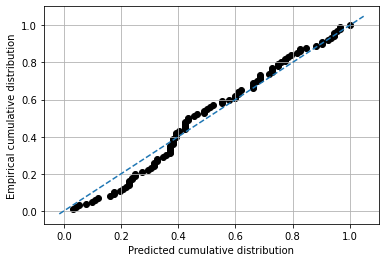

End2end test calibration error when step size is 0.001:  2.0143327032136105
End2end test calibration error when step size is 0.01:  0.20181947069943293
End2end test calibration error when step size is 0.1:  0.018525519848771262


In [4]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [5]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.94it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.86it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.72it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           2.127
  RMSE          2.863
  MDAE          1.628
  MARPD         9.039
  R2            0.856
  Correlation   0.929
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.074
  Mean-absolute Calibration Error       0.063
  Miscalibration Area                   0.063
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.228
     Group Size: 0.56 -- Calibration Error: 0.107
     Group Size: 1.00 -- Calibration Error: 0.063
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.260
     Group Size: 0.56 -- Calibration Error: 0.127
     Group Size: 1.00 -- Calibration Error: 0.074
================

Lims is None. Setting lims now:
min_max_true: (11.0, 46.6)
min_max_pred: (12.744033, 46.892937)
lims: (11.0, 46.892937)
lims_ext: (7.410706329345703, 50.48223037719727)


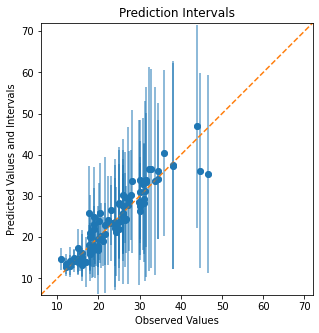

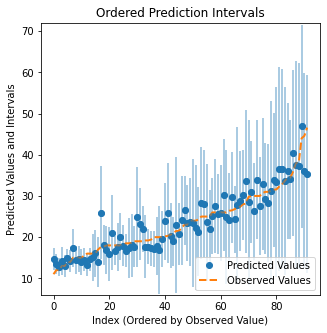

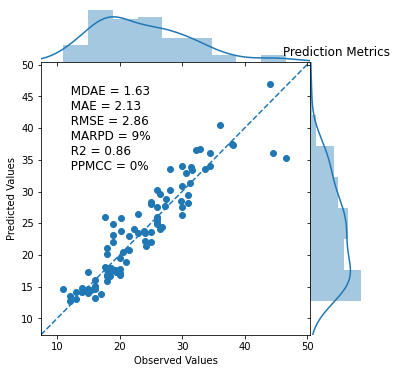

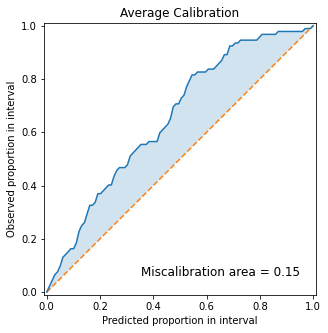

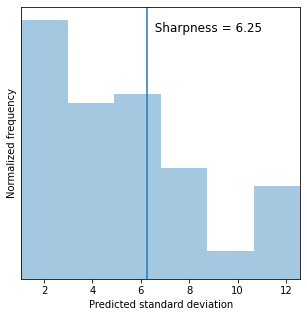

In [6]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), var_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), var_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), var_pred.squeeze(1), y)
uviz.plot_sharpness(var_pred.squeeze(1))